## Setting up Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import (KFold, train_test_split)
from matplotlib import cm
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
#ew
# Import Data
url = 'https://raw.githubusercontent.com/pgardocki3/ME8813ML/main/HW2/HW2Dataset.csv'
df = pd.read_csv(url)
df.drop('Unnamed: 0', inplace=True, axis=1) 
print(df.head())
# Split data into train/test sets
i = 0
j = 15
X = df.iloc[:,i:j]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)
# Normalization of input variables
for i in range(1, len(X_train.iloc[0,:])):
    X_train.iloc[:,i-1] = X_train.iloc[:,i-1]/np.max(X_train.iloc[:,i-1])
    
for i in range(1, len(X_test.iloc[0,:])):
    X_test.iloc[:,i-1] = X_test.iloc[:,i-1]/np.max(X_test.iloc[:,i-1])
 


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -22.292954 -1.600691  0.330602 -0.013734  0.090183  0.020969  0.031414   
1 -21.826742 -1.622691  0.325296 -0.000968  0.106613  0.029512  0.023781   
2 -21.282700 -1.605282  0.316197 -0.023318  0.071266  0.014223  0.028485   
3 -20.712370 -1.581811  0.328290 -0.037581  0.077426  0.003088  0.017815   
4 -20.184352 -1.607353  0.315499 -0.042820  0.067859 -0.010952  0.023727   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.568896  0.045594 -0.497482 -0.228197  0.234254 -0.063096 -0.045628   
1 -0.543101  0.004860 -0.492359 -0.209243  0.219184 -0.055819 -0.049811   
2 -0.564014  0.029006 -0.520116 -0.191617  0.211654 -0.061037 -0.064032   
3 -0.569806  0.040555 -0.517600 -0.205093  0.223456 -0.063236 -0.038738   
4 -0.557798  0.062040 -0.517373 -0.210795  0.180293 -0.094973 -0.066773   

       PC15  stiffness_value  
0  0.018867        81.795324  
1  0.018250        78.729488  

### Determining Clusters

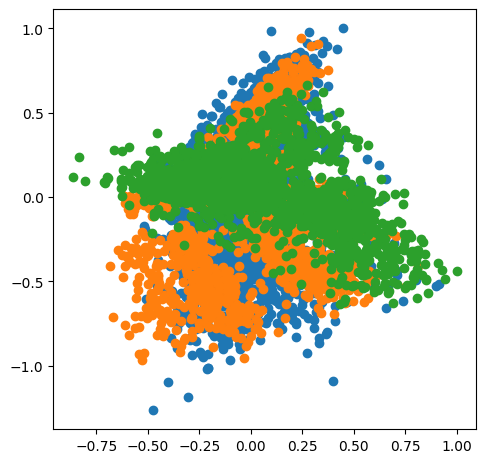

In [2]:
# Choosing the optimal k
k_range = range(1,10)
# Try clustering the data for k values ranging 1 to 10
k_means_var = [KMeans(n_clusters = k, n_init='auto').fit(X_train) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(X_train, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Calculate within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Visualize the elbow method for determining k
#plt.plot(k_range, wcss)
#plt.show()

kmeans = KMeans(n_clusters = 3, n_init='auto', random_state=1)
label = kmeans.fit_predict(X_train)
label1 = kmeans.fit_predict(X_test)
X_train_c0 = X_train[label == 0]
y_train_c0 = y_train[label == 0]
X_train_c1 = X_train[label == 1]
y_train_c1 = y_train[label == 1]
X_train_c2 = X_train[label == 2]
y_train_c2 = y_train[label == 2]

X_test_c0 = X_test[label1 == 0]
y_test_c0 = y_test[label1 == 0]
X_test_c1 = X_test[label1 == 1]
y_test_c1 = y_test[label1 == 1]
X_test_c2 = X_test[label1 == 2]
y_test_c2 = y_test[label1 == 2]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221)

u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(X_train[label == i].iloc[:,10] , X_train[label == i].iloc[:,3] , label = i)

#ax.scatter(X_train_c0.iloc[:,0],X_train_c0.iloc[:,1],y_train_c0)
#ax = fig.add_subplot(222)      
#ax.scatter(X_test_c0.iloc[:,0],X_test_c0.iloc[:,1],y_test_c0)

## Linear Regression

Mean MAE: 0.819 (0.015)
MSE 9.355791009816638


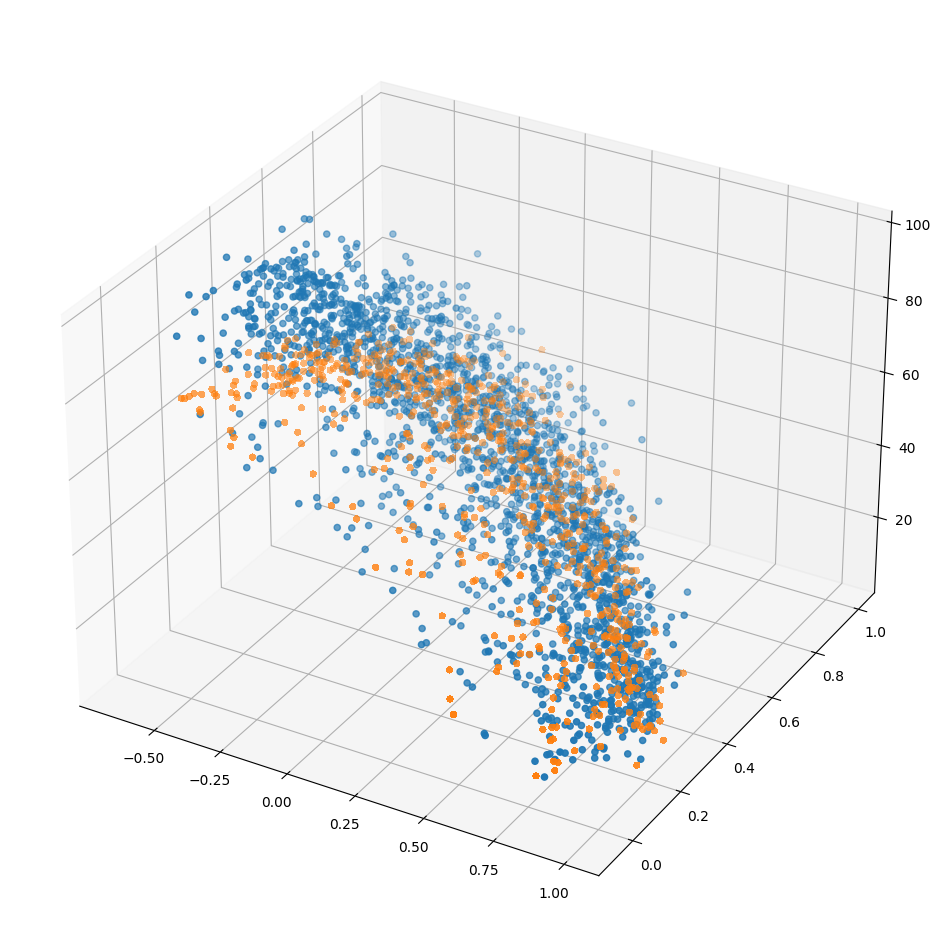

In [3]:
from sklearn import linear_model

# Selecting data
X_train = X_train_c0
y_train = y_train_c0
X_test = X_test_c0
y_test = y_test_c0

model = linear_model.Lasso(alpha=2)
cv = sk.model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = sk.model_selection.cross_val_score(model,X_train, y_train, cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
# print("* Model coefficients:")
# print("  w0:", model.intercept_)
# print("  w1:", model.coef_[0])

# Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1),
                       linewidth=0, antialiased=False)

plt.show();


## Gaussian Process Regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Exponentiation
from sklearn.model_selection import cross_val_score

# Selecting data
X_train = X_train_c0
y_train = y_train_c0
X_test = X_test_c0
y_test = y_test_c0
length = np.ones(15)
lengths = np.asarray(tuple((-1e-5,1e5) for i in range(15)))

kernel = RBF(length_scale=length,length_scale_bounds=lengths)
        
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True)
gpr.fit(X_train, y_train)
y_pred = gpr.predict(X_test)
#score = cross_val_score(gpr,X_test_c0, y_test_c0, cv=5)
#print(score)
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
print(f"RBF Lengthscale: {gpr.kernel_}")

# Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1))

plt.show()

# Variable Importance Measure
for i 
https://ema.drwhy.ai/featureImportance.html 

C:\Users\Patrick Gardocki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:335: RuntimeWarning: invalid value encountered in log
  return np.log(np.vstack(bounds))


## ANN

In [ ]:
import tensorflow as tf
# MSE 4.975905861080728
# RBF Lengthscale: RBF(length_scale=[0.12, 0.573, 0.768, 1.38, 0.546,
#     1.37, 0.503, 3.46, 1.17, 2.77, 0.515, 1.33, 1.24, 2.29, 0.556])
    
length = np.ones(15)
lengths = tuple((-1e5,1e5) for i in range(15))
print(length)
print(np.asarray(lengths))